# Exploring fish data

Use EKS on fish videos from section 5.9.6. 

## Setting up.

In [1]:
import os
import pandas as pd
import sys
from eks.utils import convert_lp_dlc
from eks.multiview_pca_smoother import ensemble_kalman_smoother_multi_cam
from eks.newton_eks import *
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm.notebook as tqdm
from scipy.optimize import *


### Fish predictions
Run eks and match outputs

In [77]:
#%run -i 'test_script.py'

Match video 1058.

In [845]:
baseline = pd.read_csv("/Users/clairehe/Documents/GitHub/eks/data/misc/mirror-fish_ensemble-predictions/eks/20210126_Sean/img001058.csv", header=[ 1, 2],index_col=0)
new = pd.read_csv("/Users/clairehe/Documents/GitHub/eks/data/misc/one-video-mirror-fish-predictions/eks_outputs/20210126_Sean/img001058.csv", header=[ 1, 2], index_col=0)

In [846]:
baseline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Columns: 135 entries, ('head_main', 'x') to ('caudal_v_right', 'likelihood')
dtypes: float64(135)
memory usage: 54.2 KB


In [847]:
baseline0.columns[::3][0][1]

'head_main'

In [848]:
baseline0 = pd.read_csv("/Users/clairehe/Documents/GitHub/eks/data/misc/mirror-fish_ensemble-predictions/eks/20210126_Sean/img001058.csv", header=[0, 1, 2],index_col=0)


In [849]:
keypoint_names = [l[1] for l in baseline0.columns[::3]]
markers_tmp = convert_lp_dlc(baseline0, keypoint_names, model_name=tracker_name)
markers_tmp.head()

,head_main_x,head_main_y,head_main_likelihood,chin_base_main_x,chin_base_main_y,chin_base_main_likelihood,chin1_4_main_x,chin1_4_main_y,chin1_4_main_likelihood,chin_half_main_x,...,dorsal_right_likelihood,anal_right_x,anal_right_y,anal_right_likelihood,caudal_d_right_x,caudal_d_right_y,caudal_d_right_likelihood,caudal_v_right_x,caudal_v_right_y,caudal_v_right_likelihood
0,284.484465,327.604150,1.0,290.952054,355.944485,1.0,290.120168,360.827529,1.0,288.758240,...,1.0,428.625227,294.041840,1.0,449.786866,226.672516,1.0,456.967427,250.862256,1.0
1,284.504398,327.655094,1.0,290.957473,355.982915,1.0,290.131126,360.849305,1.0,288.758226,...,1.0,428.586771,294.094250,1.0,449.681806,226.674966,1.0,456.858999,250.829945,1.0
2,284.561047,327.796011,1.0,290.964310,356.114071,1.0,290.143333,360.921840,1.0,288.752028,...,1.0,428.583316,294.270777,1.0,449.318618,226.664613,1.0,456.603781,250.795092,1.0
3,284.694178,328.119879,1.0,290.959048,356.508793,1.0,290.124215,361.134914,1.0,288.689506,...,1.0,429.169437,295.132569,1.0,448.213353,226.595814,1.0,456.116096,250.831631,1.0
4,284.849493,328.490232,1.0,290.958627,356.887973,1.0,290.089904,361.389809,1.0,288.558549,...,1.0,429.523763,295.636518,1.0,446.992500,226.608319,1.0,455.351106,251.095426,1.0


Text(0.5, 0.98, 'Video 1058')

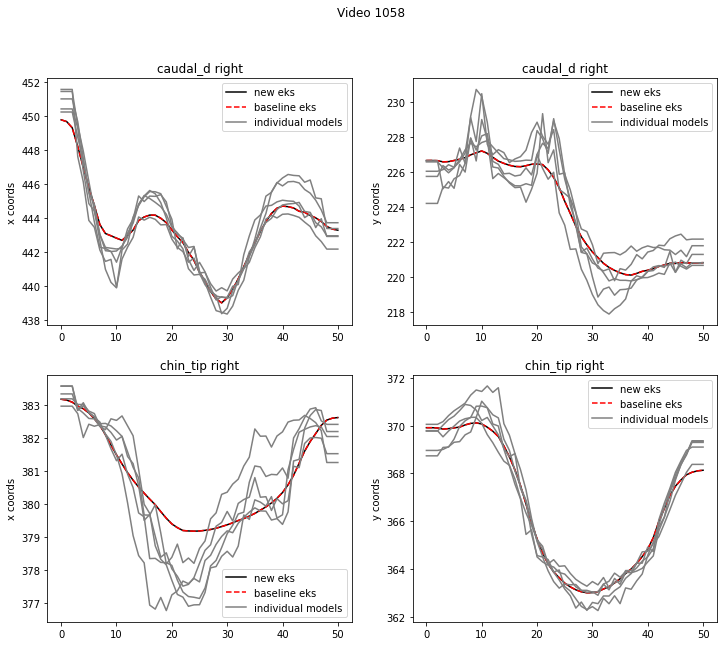

In [850]:
pathfile = "/Users/clairehe/Documents/GitHub/eks/data/misc/mirror-fish_ensemble-predictions/"

fig,ax = plt.subplots(2,2,figsize=(12,10))

ax[0,0].plot(new.caudal_d_right[["x"]], color='black')
ax[0,0].plot(baseline.caudal_d_right[["x"]], 'r--',label='baseline' )
ax[0,0].plot(pd.read_csv(pathfile+"network_0"+"/20210126_Sean/img001058.csv", header=[1,2]).caudal_d_right[["x"]], color='gray')
ax[0,0].plot(pd.read_csv(pathfile+"network_1"+"/20210126_Sean/img001058.csv", header=[1,2]).caudal_d_right[["x"]], color='gray')
ax[0,0].plot(pd.read_csv(pathfile+"network_2"+"/20210126_Sean/img001058.csv", header=[1,2]).caudal_d_right[["x"]], color='gray')
ax[0,0].plot(pd.read_csv(pathfile+"network_3"+"/20210126_Sean/img001058.csv", header=[1,2]).caudal_d_right[["x"]], color='gray')
ax[0,0].plot(pd.read_csv(pathfile+"network_4"+"/20210126_Sean/img001058.csv", header=[1,2]).caudal_d_right[["x"]], color='gray')
ax[0,0].set_ylabel("x coords")
ax[0,0].set_title("caudal_d right")
ax[0,0].legend(['new eks','baseline eks', 'individual models'])

ax[0,1].plot(new.caudal_d_right[["y"]], color='black')
ax[0,1].plot(baseline.caudal_d_right[["y"]], 'r--',label='baseline')
ax[0,1].plot(pd.read_csv(pathfile+"network_0"+"/20210126_Sean/img001058.csv", header=[1,2]).caudal_d_right[["y"]], color='gray')
ax[0,1].plot(pd.read_csv(pathfile+"network_1"+"/20210126_Sean/img001058.csv", header=[1,2]).caudal_d_right[["y"]], color='gray')
ax[0,1].plot(pd.read_csv(pathfile+"network_2"+"/20210126_Sean/img001058.csv", header=[1,2]).caudal_d_right[["y"]], color='gray')
ax[0,1].plot(pd.read_csv(pathfile+"network_3"+"/20210126_Sean/img001058.csv", header=[1,2]).caudal_d_right[["y"]], color='gray')
ax[0,1].plot(pd.read_csv(pathfile+"network_4"+"/20210126_Sean/img001058.csv", header=[1,2]).caudal_d_right[["y"]], color='gray')
ax[0,1].set_title("caudal_d right")
ax[0,1].set_ylabel("y coords")
ax[0,1].legend(['new eks','baseline eks', 'individual models'])

ax[1,0].plot(new.chin_tip_right[["x"]], color='black')
ax[1,0].plot(baseline.chin_tip_right[["x"]], 'r--',label='baseline')
ax[1,0].plot(pd.read_csv(pathfile+"network_0"+"/20210126_Sean/img001058.csv", header=[1,2]).chin_tip_right[["x"]], color='gray')
ax[1,0].plot(pd.read_csv(pathfile+"network_1"+"/20210126_Sean/img001058.csv", header=[1,2]).chin_tip_right[["x"]], color='gray')
ax[1,0].plot(pd.read_csv(pathfile+"network_2"+"/20210126_Sean/img001058.csv", header=[1,2]).chin_tip_right[["x"]], color='gray')
ax[1,0].plot(pd.read_csv(pathfile+"network_3"+"/20210126_Sean/img001058.csv", header=[1,2]).chin_tip_right[["x"]], color='gray')
ax[1,0].plot(pd.read_csv(pathfile+"network_4"+"/20210126_Sean/img001058.csv", header=[1,2]).chin_tip_right[["x"]], color='gray')
ax[1,0].set_title("chin_tip right")
ax[1,0].set_ylabel("x coords")
ax[1,0].legend(['new eks','baseline eks', 'individual models'])

ax[1,1].plot(new.chin_tip_right[["y"]],color='black')
ax[1,1].plot(baseline.chin_tip_right[["y"]], 'r--',label='baseline')
ax[1,1].plot(pd.read_csv(pathfile+"network_0"+"/20210126_Sean/img001058.csv", header=[1,2]).chin_tip_right[["y"]], color='gray')
ax[1,1].plot(pd.read_csv(pathfile+"network_1"+"/20210126_Sean/img001058.csv", header=[1,2]).chin_tip_right[["y"]], color='gray')
ax[1,1].plot(pd.read_csv(pathfile+"network_2"+"/20210126_Sean/img001058.csv", header=[1,2]).chin_tip_right[["y"]], color='gray')
ax[1,1].plot(pd.read_csv(pathfile+"network_3"+"/20210126_Sean/img001058.csv", header=[1,2]).chin_tip_right[["y"]], color='gray')
ax[1,1].plot(pd.read_csv(pathfile+"network_4"+"/20210126_Sean/img001058.csv", header=[1,2]).chin_tip_right[["y"]], color='gray')
ax[1,1].set_title("chin_tip right")
ax[1,1].set_ylabel("y coords")
ax[1,1].legend(['new eks','baseline eks', 'individual models'])

plt.suptitle("Video 1058")

Things are working properly!

### Pupil predictions

In [110]:
pupil1 = "/Users/clairehe/Documents/GitHub/eks/data/ibl-pupil/5285c561-80da-4563-8694-739da92e5dd0.left.rng=0.csv"
df_pupil = pd.read_csv(pupil1, header=[0,1,2], index_col=0)
df_pupil.head()

scorer    heatmap_mhcrnn_tracker                                      \
bodyparts            pupil_top_r                       pupil_right_r   
coords                         x          y likelihood             x   
0                      53.971542  40.784889   0.996096     63.997185   
1                      53.971542  40.784889   0.996096     63.997185   
2                      53.971542  40.784889   0.996096     63.997185   
3                      54.682766  41.602886   0.994934     64.214340   
4                      54.535515  41.143906   0.999473     64.464943   

scorer                                                                \
bodyparts                       pupil_bottom_r                         
coords             y likelihood              x          y likelihood   
0          50.457775   0.998967      54.795803  61.129665   0.995241   
1          50.457775   0.998967      54.795803  61.129665   0.995241   
2          50.457775   0.998967      54.795803  61.129665   0.995241   
3          50.438499   0.996683      55.169212  61.332661   0.999601   
4          50.506241   0.999723      55.322891  60.785454   0.999518   

scorer                                        
bodyparts pupil_left_r                        
coords               x          y likelihood  
0            42.372387  51.355415   0.996667  
1            42.372387  51.355415   0.996667  
2            42.372387  51.355415   0.996667  
3            43.415447  50.964855   0.998236  
4            44.182907  51.238132   0.999794

In [851]:
%run -i 'scripts/pupil_example.py' --csv-dir 'data/ibl-pupil' --save-dir 'data/misc/pupil-test/' --diameter-s 0.99 --com-s 0.99 

Smoothing matrix: [[0.99 0.   0.  ]
 [0.   0.99 0.  ]
 [0.   0.   0.99]]
filtering...
done filtering
smoothing...
done smoothing
saving smoothed predictions to data/misc/pupil-test/kalman_smoothed_pupil_traces.csv
saving latents to data/misc/pupil-test/kalman_smoothed_latents.csv
see example EKS output at data/misc/pupil-test/example_eks_result.pdf


In [112]:
pupil_latent = pd.read_csv("/Users/clairehe/Documents/GitHub/eks/data/misc/pupil-test/kalman_smoothed_latents.csv", header=[0,1], index_col=0)
pupil_latent.head()

scorer ensemble-kalman_tracker                      
latent                diameter      com_x      com_y
0                    19.820629  54.719227  50.747470
1                    19.707099  54.772514  50.759262
2                    19.554894  54.870607  50.772020
3                    19.337871  55.074898  50.760586
4                    19.162826  55.176431  50.757116

In [113]:
pupil_trace = pd.read_csv("/Users/clairehe/Documents/GitHub/eks/data/misc/pupil-test/kalman_smoothed_pupil_traces.csv", header=[0,1,2],index_col=0)
pupil_trace.head()

scorer    ensemble-kalman_tracker                                      \
bodyparts             pupil_top_r                       pupil_right_r   
coords                          x          y likelihood             x   
0                       54.719227  40.837156        NaN     64.629542   
1                       54.772514  40.905712        NaN     64.626064   
2                       54.870607  40.994573        NaN     64.648054   
3                       55.074898  41.091650        NaN     64.743833   
4                       55.176431  41.175703        NaN     64.757844   

scorer                                                                \
bodyparts                       pupil_bottom_r                         
coords             y likelihood              x          y likelihood   
0          50.747470        NaN      54.719227  60.657785        NaN   
1          50.759262        NaN      54.772514  60.612811        NaN   
2          50.772020        NaN      54.870607  60.549467        NaN   
3          50.760586        NaN      55.074898  60.429521        NaN   
4          50.757116        NaN      55.176431  60.338529        NaN   

scorer                                        
bodyparts pupil_left_r                        
coords               x          y likelihood  
0            44.808913  50.747470        NaN  
1            44.918965  50.759262        NaN  
2            45.093160  50.772020        NaN  
3            45.405963  50.760586        NaN  
4            45.595018  50.757116        NaN

In [868]:
q = pupil_latent.to_numpy()


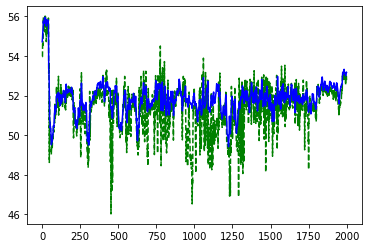

In [145]:
plt.plot(df_pupil['heatmap_mhcrnn_tracker']['pupil_top_r']['x'], 'g--')
plt.plot(pupil_trace['ensemble-kalman_tracker']['pupil_top_r']['x'], 'b')
#plt.plot(pupil_latent['ensemble-kalman_tracker']['com_x'], 'r-.')

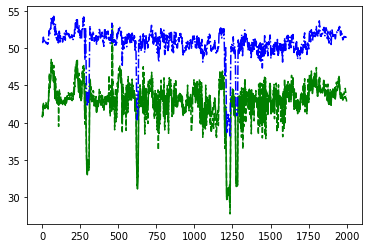

In [114]:
plt.plot(df_pupil['heatmap_mhcrnn_tracker']['pupil_top_r']['y'],'g--')
plt.plot(pupil_trace['ensemble-kalman_tracker']['pupil_top_r']['y'],'g')
plt.plot(pupil_latent['ensemble-kalman_tracker']['com_y'], 'b-.')

In [116]:
keypoint_names = [c[1] for c in df_pupil.columns[::3]]
model_name = df_pupil.columns[0][0]
markers_curr_fmt = convert_lp_dlc(df_pupil, keypoint_names, model_name=model_name)

In [117]:
keypoint_names

['pupil_top_r', 'pupil_right_r', 'pupil_bottom_r', 'pupil_left_r']

In [118]:
markers_curr_fmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   pupil_top_r_x              2000 non-null   float64
 1   pupil_top_r_y              2000 non-null   float64
 2   pupil_top_r_likelihood     2000 non-null   float64
 3   pupil_right_r_x            2000 non-null   float64
 4   pupil_right_r_y            2000 non-null   float64
 5   pupil_right_r_likelihood   2000 non-null   float64
 6   pupil_bottom_r_x           2000 non-null   float64
 7   pupil_bottom_r_y           2000 non-null   float64
 8   pupil_bottom_r_likelihood  2000 non-null   float64
 9   pupil_left_r_x             2000 non-null   float64
 10  pupil_left_r_y             2000 non-null   float64
 11  pupil_left_r_likelihood    2000 non-null   float64
dtypes: float64(12)
memory usage: 203.1 KB


## Optimisation-based EKS

### 5.9.6 Nonlinear observations and constrained dynamics
What if we have access to multiple well-calibrated cameras, as in e.g. (Dunn et al., 2021)? In this setting we can apply a strong constraint: limb lengths are constant, i.e., the 3D distance between body parts $j$ and $k$ should be fixed at some value $L_{jk}$ (Karashchuk et al., 2021; Zhang et al., 2021).

We may also want to handle potential nonlinearities in the mapping from the true three-dimensional coordinates onto the camera plane.

How to incorporate these constraints and nonlinearities into the EKS? We can use the well-known fact that the Kalman smoother can be written as the solution to an optimization problem involving a block-tridiagonal Hessian (Paninski et al., 2010):
$\hat{Q} = \arg \max_Q \log p(Q|O) = \arg \max_Q \log p(Q) + \log p(O|Q)$
with $\log p(Q) = -\frac{1}{2} \sum_{tk} (q_{tk} - q_{t+1,k})^T E_k^{-1} (q_{tk} - q_{t+1,k})$ and $\log p(O|Q) =-\frac{1}{2} \sum_{tkv} (f_{v}(q_{tk}) - O_{tkv})^T D_{tkv}^{-1} (f_v(q_{tk}) - O_{tkv})$

Here t indexes frames, k bodyparts, and v camera views. The first term encodes the (Gaussian) dynamics model as above; the second term encodes the observation model, where the (potentially nonlinear) functions fv map the keypoints into the v-th camera plane.

Finally, we can express the constraints in terms of penalties of the form $\sum_{tjk} - \lambda(||q_{tj}-q_{tk}||_2 - L_{jk})^2$  for an appropriate Lagrange parameter $\lambda$.

Adding all these terms, we arrive at a non-quadratic objective function with a block tridiagonal Hessian; if we use a good initial $Q$ then this objective function should be locally concave, and we can efficiently ascend via the usual block tridiagonal Newton-based iterations (with each Newton step requiring $O(T)$ computation). The output of this approach simultaneously triangulates the observations to obtain the true three-dimensional body part locations, while temporally smoothing and enforcing geometric constraints.

### Ensemble Kalman smoother

observation : $$o_t = B_tq_t + n_t = f_v(q_{tk})+n_t, \ \ n_t \sim N(\mu, D_t)$$ 
latent : $$q_{t} = A_t q_{t-1} + e_{t} = q_{t-1,k}+e_t, \ \ e_{t} \sim N(0, E_t)$$
Then $H = \begin{pmatrix} T_1 & R_{12}^T & \dots & 0 \\
                           R_{12} & T_2 & R_{23}^T & \vdots \\ 
                           0 & R_{23} & \ddots & 0  \\ 
                            \vdots & \ddots &  \ddots & R_{n-1, n}^T \\
                           0 & \dots & R_{n-1,n} & T_n
                           \end{pmatrix}$
                           


$H$ is with $R_{i,i+1} = \frac{\partial^2}{\partial q_i \partial q_{i+1}} \log p(q_{i+1}|q_i) = E_{k}^{-1} A_{k}$, $$T_{i} =  \frac{\partial^2}{\partial q_i^2} \log p(o_i|q_i)+\frac{\partial^2}{\partial q_i^2} \log p(q_{i+1}|q_{i}) = - (E^{-1} + A^T E^{-1} A + B^T D^{-1} B)$$

Newton with iteration $q^{i+1} = q^i - H^{-1} \nabla$.

Dimensions: $o_t \in \mathbb{R}^{2K}$, $q_t \in \mathbb{R}^r$, $B \in  \mathbb{R}^{2K \times r}$ and $A_t \in \mathbb{R}^{r\times r}$, $E_t \in \mathbb{R}^{r\times r}$, $D_t \in \mathbb{R}^{2K \times 2K}$

In [852]:

scaled_ensemble_preds = ensemble_preds.copy()
scaled_ensemble_stacks = ensemble_stacks.copy()
# subtract COM means from the ensemble predictions
for i in range(ensemble_preds.shape[1]):
    if i % 2 == 0:
        scaled_ensemble_preds[:, i] -= mean_x_obs
    else:
        scaled_ensemble_preds[:, i] -= mean_y_obs
# subtract COM means from all the predictions
for i in range(ensemble_preds.shape[1]):
    if i % 2 == 0:
        scaled_ensemble_stacks[:, :, i] -= mean_x_obs
    else:
        scaled_ensemble_stacks[:, :, i] -= mean_y_obs
y = scaled_ensemble_preds


We use the values for the kalman filter to test with the pupil data. Assume $f_v$ is linear with $f_v(q_t) = B_t q_t$. Latent space dimension is 3, observation is 8.

In [897]:
from eks.utils import make_dlc_pandas_index
from eks.ensemble_kalman import ensemble
from eks.pupil_utils import get_pupil_location, get_pupil_diameter

# compute ensemble median
keys = ['pupil_top_r_x', 'pupil_top_r_y', 'pupil_bottom_r_x', 'pupil_bottom_r_y',
        'pupil_right_r_x', 'pupil_right_r_y', 'pupil_left_r_x', 'pupil_left_r_y']
ensemble_preds, ensemble_vars, ensemble_stacks, keypoints_mean_dict, keypoints_var_dict, keypoints_stack_dict = ensemble(
    markers_list, keys)

# ## Set parameters
# compute center of mass
pupil_locations = get_pupil_location(keypoints_mean_dict)
pupil_diameters = get_pupil_diameter(keypoints_mean_dict)
diameters = []
for i in range(len(markers_list)):
    keypoints_dict = keypoints_stack_dict[i]
    diameter = get_pupil_diameter(keypoints_dict)
    diameters.append(diameter)

mean_x_obs = np.mean(pupil_locations[:, 0])
mean_y_obs = np.mean(pupil_locations[:, 1])
# make the mean zero
x_t_obs, y_t_obs = pupil_locations[:, 0] - mean_x_obs, pupil_locations[:, 1] - mean_y_obs

#q = np.vstack((pupil_diameters, x_t_obs, y_t_obs))


In [898]:
y.shape

(2000, 8)

In [899]:
df_pupil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   (heatmap_mhcrnn_tracker, pupil_top_r, x)              2000 non-null   float64
 1   (heatmap_mhcrnn_tracker, pupil_top_r, y)              2000 non-null   float64
 2   (heatmap_mhcrnn_tracker, pupil_top_r, likelihood)     2000 non-null   float64
 3   (heatmap_mhcrnn_tracker, pupil_right_r, x)            2000 non-null   float64
 4   (heatmap_mhcrnn_tracker, pupil_right_r, y)            2000 non-null   float64
 5   (heatmap_mhcrnn_tracker, pupil_right_r, likelihood)   2000 non-null   float64
 6   (heatmap_mhcrnn_tracker, pupil_bottom_r, x)           2000 non-null   float64
 7   (heatmap_mhcrnn_tracker, pupil_bottom_r, y)           2000 non-null   float64
 8   (heatmap_mhcrnn_tracker, pupil_bottom_r, likelihood)  2000

In [900]:
# Initial states
r = 3
T=2000
mu0 = np.asarray([np.mean(pupil_diameters), 0.0, 0.0])

# diagonal: var
S0 = np.asarray([
    [np.var(pupil_diameters), 0.0, 0.0],
    [0.0, np.var(x_t_obs), 0.0],
    [0.0, 0.0, np.var(y_t_obs)]
])

A = np.asarray([
    [0.99, 0, 0],
    [0, 0.99, 0],
    [0, 0, 0.99]
])
B = np.asarray([[0, 1, 0], [-.5, 0, 1], [0, 1, 0], 
                [.5, 0, 1], [.5, 1, 0], [0, 0, 1], 
                [-.5, 1, 0],[0, 0, 1]])

# state covariance matrix
E = np.asarray([
        [np.var(pupil_diameters) * (1 - (A[0, 0] ** 2)), 0, 0],
        [0, np.var(x_t_obs) * (1 - A[1, 1] ** 2), 0],
        [0, 0, np.var(y_t_obs) * (1 - (A[2, 2] ** 2))]
    ])

D = np.eye(8)

In [760]:
def gradient(y, mu0, S0, q, A, B, invE, invD, f = None, df = None, df2 = None):
    """ Calculates hessian for log p(Q|Y)
    Linear is assumed as default, if non linear observation map, use f, df, df2
    
    Args:
        y: np.ndarray
            shape (n_samples, n_keypoints)
        mu0: np.ndarray
            shape (n_latents)
        A: np.ndarray
            shape (n_latents, n_latents)
        B: np.ndarray
            shape (n_keypoints, n_latents)
        invD: np.ndarray
            shape (n_keypoints, n_keypoints)
        invE: np.ndarray
            shape (n_latents, n_latents)
        f: np.ndarray
            shape (n_samples, n_keypoints)
        df: np.ndarray
            shape (n_samples, n_keypoints)
        df2: np.ndarray
            shape (n_samples, n_keypoints)
     """ 
    T = y.shape[0]
    r = mu0.shape[0]
    G = np.zeros(shape=(T, r))

    for i in range(1,T-1):
        if f == None:
            # linear map
            G[i,:] = - invE @(q[:,i] - A@q[:,i-1])+ A.T @ invE @(q[:,i+1]-A@q[:,i]) + B.T @ invD @ (y[i,:] - B @ q[:,i])
            #print(G[i,:])
        else :
            G[i,:] = - invE @(q[:,i] - A@q[:,i-1])+ A.T @ invE @(q[:,i+1]-A@q[:,i]) + df.T @ invD @ (f[:,i]-q[:,i])
    # Boundary condition
    G[0, :] = A.T @ invE @ (q[:,1]-A@q[:,0])
    G[T-1,:] =  - invE @(q[:,T-1] - A@q[:,T-2])+ A.T @ invE @(-A@q[:,T-1]) + B.T @ invD @ (y[T-1,:] - B @ q[:,T-1])
    
    return G

G = gradient(y, mu0, S0, A, B, invE, invD, f = None, df = None, df2 = None)


    
def gradient(y, mu0, S0, q, A, B, invE, invD, f = None, df = None, df2 = None):
    """ Calculates hessian for log p(Q|Y)
    Linear is assumed as default, if non linear observation map, use f, df, df2
    
    Args:
        y: np.ndarray
            shape (n_samples, n_keypoints)
        mu0: np.ndarray
            shape (n_latents)
        q : np.ndarray -- latent variables obtained from mu0 and our Markov chain
            shape (n_latents, n_samples)
        A: np.ndarray
            shape (n_latents, n_latents)
        B: np.ndarray
            shape (n_keypoints, n_latents)
        invD: np.ndarray
            shape (n_keypoints, n_keypoints)
        invE: np.ndarray
            shape (n_latents, n_latents)
        f: np.ndarray
            shape (n_samples, n_keypoints)
        df: np.ndarray
            shape (n_samples, n_keypoints)
        df2: np.ndarray
            shape (n_samples, n_keypoints)
     """ 

    T = y.shape[0]
    r = mu0.shape[0]
    G = np.zeros(shape=(T, r))

    for i in range(1,T-1):
        if f == None:
            # linear map
            G[i,:] = - invE @(q[:,i] - A@q[:,i-1])+ A.T @ invE @(q[:,i+1]-A@q[:,i]) + B.T @ invD @ (y[i,:] - B @ q[:,i])
        else :
            G[i,:] = - invE @(q[:,i] - A@q[:,i-1])+ A.T @ invE @(q[:,i+1]-A@q[:,i]) + df.T @ invD @ (f[:,i]-q[:,i])
    # Boundary condition
    G[0, :] = A.T @ invE @ (q[:,1]-A@q[:,0])
    G[T-1,:] =  - invE @(q[:,T-1] - A@q[:,T-2])+ A.T @ invE @(-A@q[:,T-1]) + B.T @ invD @ (y[T-1,:] - B @ q[:,T-1])
    return G



TypeError: gradient() missing 1 required positional argument: 'invD'

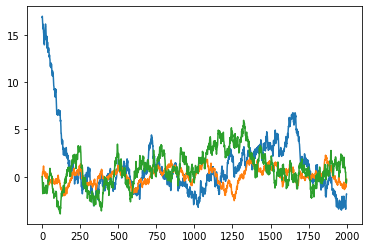

In [391]:
np.random.seed(123)
q = np.zeros((r,T))
q[:,0] = mu0
for i in range(1,T):
    q[:,i] = np.random.multivariate_normal(A@q[:,i-1], E,1)
    
for i in range(3):
    plt.plot(q[i,:])

Use pupil data for test

In [719]:
T = y.shape[0]
invE = np.linalg.inv(E)
invD = np.linalg.inv(D)

Full matrix of size T by T


<AxesSubplot:>

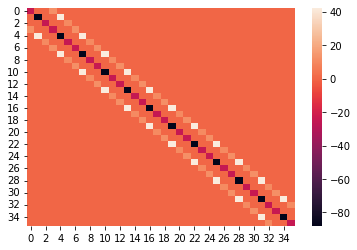

In [185]:
G = gradient(y, mu0, S0, A, B, invE, invD)
H = hessian(y, q, A, B, invD, invE)
sns.heatmap(H[:36,:36])

<AxesSubplot:>

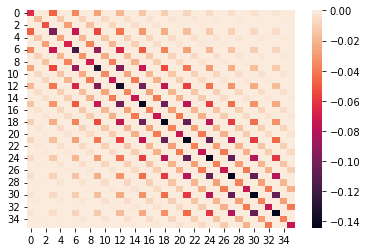

In [105]:
sns.heatmap(np.linalg.inv(H)[:36,:36])

(1997, 1997)

In [723]:

def hessian(y, mu0, S0, A, B, invD, invE, f = None, df = None, df2 = None, compressed=False):
    """ Calculates hessian for log p(Q|Y)
        obs : y_t|q_t = f(q_t)+ N(0, D) if linear, f(q) = B*q if not df = f'(q), df2 = f''(q)
        latent : q_t|q_{t-1} = A*q_{t-1}+N(0,E)
        
    Args:
        y: np.ndarray -- Each column is the vector of observations of keypoint
            shape (n_samples, n_keypoints)
        mu0: np.ndarray
            shape (n_latents)
        A: np.ndarray
            shape (n_latents, n_latents)
        B: np.ndarray
            shape (n_keypoints, n_latents)
        invD: np.ndarray
            shape (n_keypoints, n_keypoints)
        invE: np.ndarray
            shape (n_latents, n_latents)
        f: np.ndarray
            shape (n_samples, n_keypoints)
        df: np.ndarray
            shape (n_samples, n_keypoints)
        df2: np.ndarray
            shape (n_samples, n_keypoints)
     """ 
    T = y.shape[0]
    r = mu0.shape[0]
    H = np.zeros(shape=(2*r,2*r))  # Hessian should be a block tridiagonal matrix with T blocks of size r by r but we can store the submatrix of size 2*r by 2*r since Kalman equations are quadratic
    
    if f == None: 
        # linear observation map
        H[:r, :r] =  (B.T @ invD @ B + A.T @ invE @ A + invE)
        H[r:, r:] =  (B.T @ invD @ B + A.T @ invE @ A + invE)
    else:
        H[:r, :r] = (df2.T @ invD @ (f - y)+ df.T @ invD @ df)
        H[r:, r:] = (df2.T @ invD @ (f - y)+ df.T @ invD @ df)
    H[:r, r:] = - A.T @ invE
    H[r:, :r] = -(A.T @ invE).T  
    if compressed == True:
        print(np.linalg.det(H))
        return H
    else :
        bigH = np.zeros((T, T))
        for i in range(T//r -1):
            bigH[r * i:r * (i+1), r*i:r*(i+1)] = H[:r,:r] # diagonal 
            bigH[r * (i + 1):r * (i + 2), r * i:r * (i + 1)] = H[r:, :r]  # Subdiagonal blocks
            bigH[r * i:r * (i + 1), r * (i + 1):r * (i + 2)] = H[:r, r:]  # Superdiagonal blocks
        bigH[:r,:r] = np.linalg.inv(S0)+ A.T@invE@A
        bigH[T-2*r:T,T-2*r:T] = H
        print("Full matrix of size T by T")
        print(np.linalg.det(H))
        return bigH
    

In [724]:
def newton_linear(y,mu0, S0, q, A, B, invE, invD, max_iter=1000, eps = 0.01):
    H_1 = np.linalg.inv(hessian(y, mu0, A, B, invD, invE))
    old = q.T
    loss = [obj_loglikelihood(y, old.T, invE, invD, A, B)]
    
    for it in tqdm.tqdm(range(max_iter)):
        G = gradient(y, mu0, S0, old.T, A, B, invE, invD)

        new = old - H_1@ G
        obj = obj_loglikelihood(y,new.T,invE,invD, A, B)
        loss.append(obj)
        if np.linalg.norm(new - old) < eps:
            print("Local maximum reached before maximum iterations reached")
            break
            return old 
        else:
            old = new
            
    return new,loss


In [722]:
from eks.newton_eks import *
#sol,loss = newton_linear(y,mu0,S0,q,A,B,invE,invD, max_iter = 5000)


Using this paper https://arxiv.org/pdf/1303.1993.pdf we see that we can use $E = diag(\{ E_t\}), D = diag(\{D_t\}), A = diag(\{A_t\}), B = diag(\{B_t\})$, $o = vec(\{o_t\}), \tilde{q} = vec(A\mu_0, 0, \dots, 0)$, $q = vec(\{q_t\})$, $q_0 = \mu_0$
and the optimisation problem becomes 
$$\min_q \ (q - A\tilde{q})^T D^{-1} (q-A\tilde{q}) + (o - Bq)^T E^{-1} (o -Bq)$$

Can recognise a least square problems with matrix norms and gradient equation becomes $(B^T D^{-1} B + A^T E^{-1} A) q = B^T D^{-1} o + A^T E^{-1} \tilde{q}$

To solve this last equation we use Newton Raphson. For a linear relationship, this means only one iteration should solve the estimate. 

In [246]:
H[:2,:3],H[2:5,:3]

(array([[-24.4628848 ,  -0.        ,  -0.        ],
        [ -0.        , -87.95576595,  -0.        ]]),
 array([[ -0.        ,  -0.        , -24.66278851],
        [ 11.73084993,   0.        ,   0.        ],
        [  0.        ,  41.97576299,   0.        ]]))

In [242]:
grad_z = dict.fromkeys(range(0, 10))
grad_z[1] = 'a'
grad_z[0] = np.array([1,2])
print(grad_z[0])

[1 2]


In [729]:
def schur_diag(H,k,l):
    """ Schur inversion lemma diagonal blocks 
    
    We need to invert H = ([A,B],[C,D]) with square blocks A of dimension k by k
    and D of dimension l by l and extract the inverted matrix's diagonal blocks 
    using Schur complement D'=(D-CA^{-1}B)^{-1}
    
    Trick: Computationally less expensive use Woodbury's lemma 
    (D-CA^{-1}B)^{-1} = D^{-1} + D^{-1}C(A -BD^{-1}C)^{-1}BD^{-1}
    
    H: np.ndarray -- Matrix of interest
        shape (k+l, k+l)
    k: int64 -- gives the top left block's dimensions
    l: int64 -- gives the bottom left block's dimensions
    """

    assert H.shape[0] == k+l
    M = np.zeros((k+l,k+l))
    A = H[:k,:k]
    D = H[k:k+l,k:k+l]
    B = H[:k,k:k+l]
    C = H[k:k+l, :k]
    invD = np.linalg.inv(D)
    #print(A-B@invD@C)
    if (np.linalg.matrix_rank(A - B@invD@C)== np.linalg.matrix_rank(A)):
        M[:k,:k] = np.linalg.inv(A-B@invD@C)
        M[k:k+l,k:k+l] = invD+invD@C@M[:k,:k]@B@invD
  
        return M
    else:
        print("Singular matrix")
    
def kalman_newton_recursive2(y, mu0, S0, A, B, D, E, f = None, df = None,df2 = None):
    """
    One-pass Kalman recursive method described in J. Humphrey et J. West, "Kalman filtering with Newton's method" 
    https://math.byu.edu/~jeffh/publications/papers/HW.pdf 
    
    
    """
    r = mu0.shape[0]
    T = y.shape[0]
    
    invE = np.linalg.inv(E)
    invD = np.linalg.inv(D)
    grad_z = dict.fromkeys(range(0, T))
    q = np.zeros((T,r))
    q[0,:]= (mu0+np.linalg.inv(S0)@B.T@invD@y[0,:])


    if f == None:
        print("Linear solve...")
        
        # H = hessian(y, mu0, A, B, invD, invE, compressed=True),r,r
        #P = np.linalg.inv(S0)
        P = schur_diag(hessian(y, mu0, S0, A, B, invD, invE, compressed=True),r,r)[r:2*r, r:2*r] # select bottom right block
        for t in tqdm.tqdm(range(1,T-1)):
           # z[t,:] = np.vstack([z[t-1,:], A@q[t-1,:]]) 
           # grad_z[t] = np.vstack([0, B.T@invD@(B@A@q[t,:]-y[t,:])])
           # Newton step : z = z - (H_new)^{-1} grad_z 
           # print(q[t,:].shape, P.shape, B.T.shape)
            q[t,:] = A@q[t-1,:]-P@B.T@invD@(B@A@q[t-1,:]-y[t,:])   

            # F = np.hstack([np.zeros((3, 3*t)),A.T])
            # print((H + F.T @invE @ F).shape, (F.T @ invE).shape, (B.T@invD@B).shape)
            # H = np.block([[H + F.T @invE @ F, - F.T @ invE],[-( F.T @ invE).T , invE + B.T @ invD @B]])

            # P = schur_diag(np.block([[H + F.T @invE @ F, - F.T @ invE],[-( F.T @ invE).T , invE + B.T @ invD @B]]), len(H)-r,r)[len(H)-r:, len(H)-r:]       
            # Inversion lemmata simplifies to
            
            # np.linalg.inv(np.linalg.inv(E+A@P@A.T)+B.T@invD@B)
            
            P = np.linalg.inv(np.linalg.inv(E+A@P@A.T)+B.T@D@B)
            
            
        q[T-1,:] = A@q[T-2,:]-P@B.T@invD@(B@A@q[T-2,:]-y[T-1,:])  
    #else: 
        # to be done, gradient is less straightforward
    return q
    

In [731]:
q_test = kalman_newton_recursive(y[:,:], mu0,S0, A, B, D, E)

Linear solve...
1380728843.2012458


  0%|          | 0/1998 [00:00<?, ?it/s]

In [802]:
q[0,], (mu0+np.linalg.inv(S0)@B.T@invD@y[0,:])[:]   

(array([19.82062916, 54.71922714, 50.74747018]),
 array([21.81116889,  8.43144347, -0.08743296]))

 struggles after 35%

Text(0.5, 0.98, 'Kalman eks vs optimisation based latent predictions on pupil data')

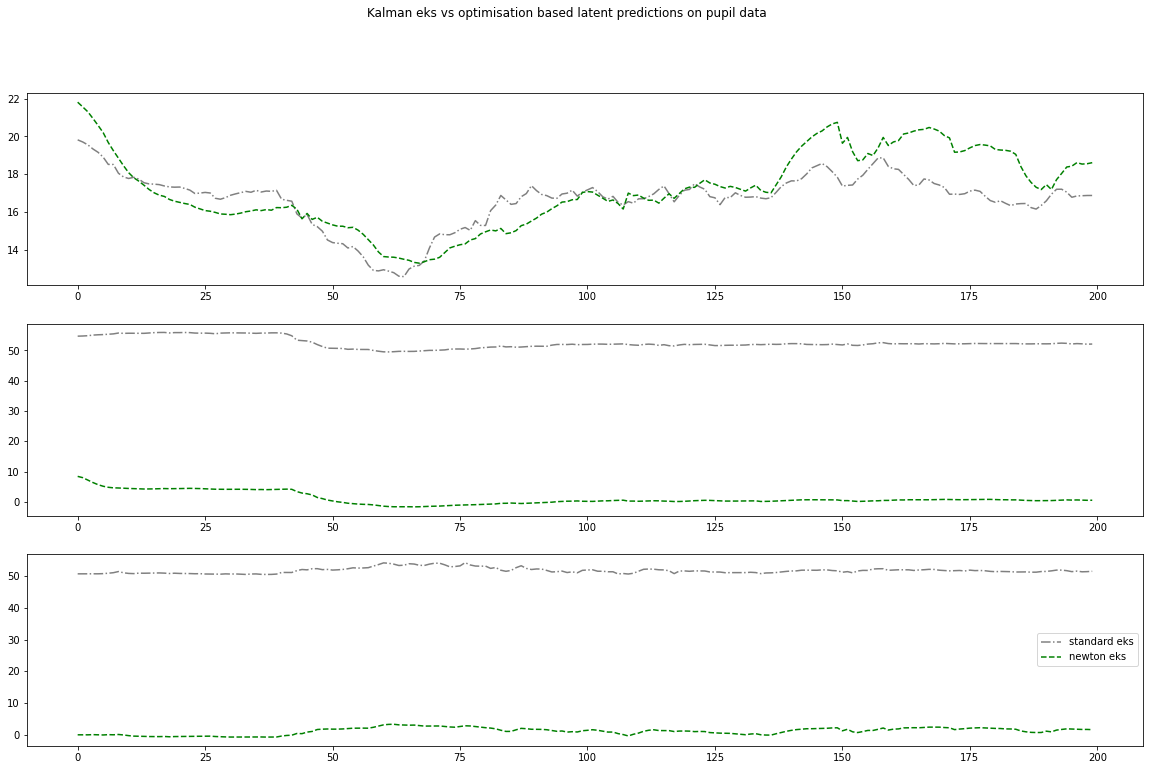

In [901]:
fig, ax = plt.subplots(3,1,figsize=(20,12))
for i in range(3):
    ax[i].plot(q[:200,i], "-.",color="grey", label="standard eks")
    ax[i].plot(q_test[:200,i], "--",color="green", label="newton eks")
plt.legend()
plt.suptitle("Kalman eks vs optimisation based latent predictions on pupil data")

In [737]:

    
def kalman_newton_recursive(y, mu0, S0, A, B, D, E, f = None, df = None,df2 = None):
    """
    One-pass Kalman recursive method described in J. Humphrey et J. West, "Kalman filtering with Newton's method" 
    https://math.byu.edu/~jeffh/publications/papers/HW.pdf 
    
    
    """
    r = mu0.shape[0]
    T = y.shape[0]
    
    invE = np.linalg.inv(E)
    invD = np.linalg.inv(D)
    grad_z = dict.fromkeys(range(0, T))
    q = np.zeros((T,r))
    q[0,:] = (mu0+np.linalg.inv(S0)@B.T@invD@y[0,:])


    if f == None:
        print("Linear solve...")
        
        # H = hessian(y, mu0, A, B, invD, invE, compressed=True),r,r
        P = schur_diag(hessian(y, mu0, S0, A, B, invD, invE, compressed=True),r,r)[r:2*r, r:2*r] # select bottom right block
        for t in tqdm.tqdm(range(1,T-1)):
           # idea is to define z[t,:] = np.vstack([z[t-1,:], A@q[t-1,:]]) 
           # so grad_z[t] = np.vstack([0, B.T@invD@(B@A@q[t,:]-y[t,:])])
           # Newton step : z = z - (Hessian)^{-1} grad_z 
           # where hessian is block tridiagonal 
           # can be simplified using Schur, Woodbury and tridiagonal 
           # structure to the following updates
            q[t,:] = A@q[t-1,:]-P@B.T@invD@(B@A@q[t-1,:]-y[t,:])   

            P = np.linalg.inv(np.linalg.inv(E+A@P@A.T)+B.T@D@B)
            
        q[T-1,:] = A@q[T-2,:]-P@B.T@invD@(B@A@q[T-2,:]-y[T-1,:])  
    #else: 
        # to be done, gradient is less straightforward
    return q
    

    
    

In [799]:
q_test = kalman_newton_recursive(y, mu0, S0, A, B, D, E)

Linear solve...
1380728843.2012458


  0%|          | 0/1998 [00:00<?, ?it/s]

Text(0.5, 0.98, 'Kalman eks vs optimisation based latent predictions on pupil data')

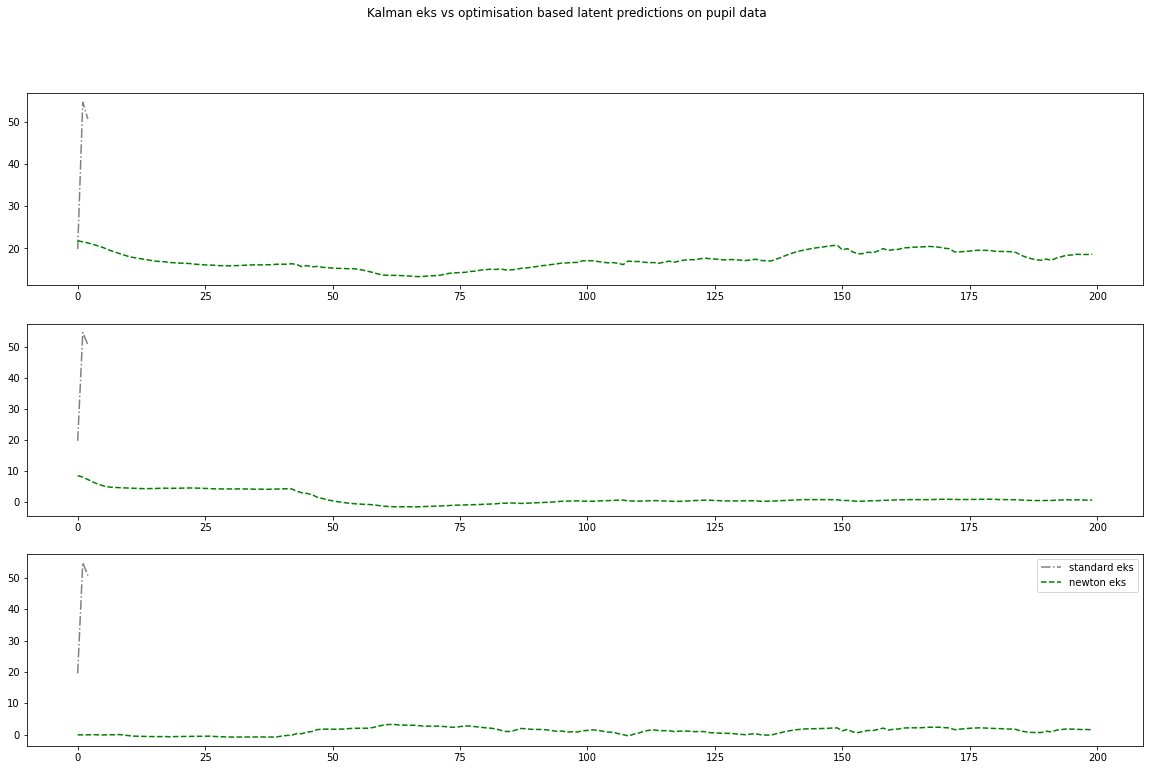

In [902]:
fig, ax = plt.subplots(3,1,figsize=(20,12))
for i in range(3):
    ax[i].plot(q[i,:200], "-.",color="grey", label="standard eks")
    ax[i].plot(q_test[:200,i], "--",color="green", label="newton eks")
plt.legend()
plt.suptitle("Kalman eks vs optimisation based latent predictions on pupil data")

In [788]:
def get_likelihood(y, q, mu0, S0, A, B, D, E):
    invE = np.linalg.inv(E)
    invD = np.linalg.inv(D)
    loglik = np.zeros(T)
    loglik[0]= (q[:,0]-mu0).T @ np.linalg.inv(S0) @ (q[:,0]-mu0)
    for k in range(1,y.shape[0]):
        loglik[k] = (y[k,:]-B@q[:,k]).T@invD@(y[k,:]-B@q[:,k])
        + (q[:,k]-A@q[:,k-1]).T@invE@(q[:,k]-A@q[:,k-1])+loglik[k-1]
    plt.plot(loglik)
    return loglik
    

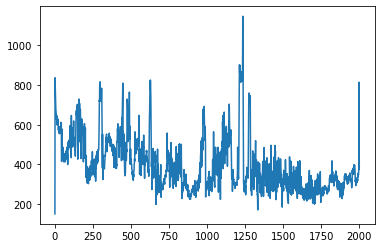

In [795]:
log_test2 = get_likelihood(y, q_test2, mu0, S0, A, B, D, E)

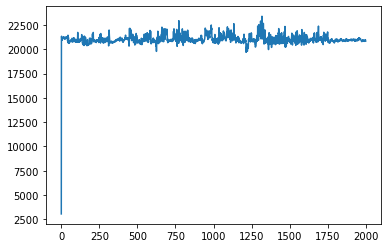

In [796]:
log_final = get_likelihood(y, q.T, mu0, S0, A, B, D, E)

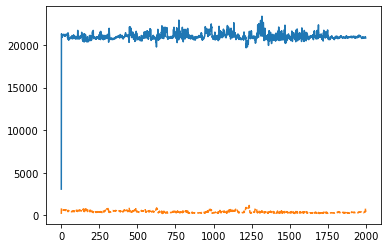

In [798]:
plt.plot(log_final)
plt.plot(log_test2, "--")

In [375]:
# predictions 

y_preds = (B@q).T
y_preds.shape

(2000, 8)

Text(0.5, 1.0, 'smoothed prediction for pupil_top_r')

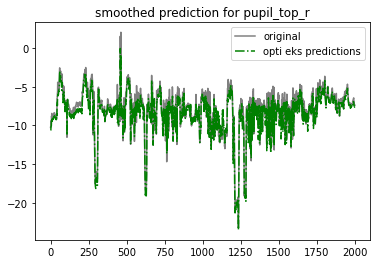

In [381]:
plt.plot(y[:,1], color='grey', label='original')
plt.plot(y_preds[:,1],'-.', color='green', label = 'opti eks predictions')
plt.legend()
plt.title("smoothed prediction for pupil_top_r")

$\arg \max_Q Q^T A Q + b^T Q = A^{-1}b$ with $A =  - H - I_T \circ B^T D^{-1} B$,
$b = \pmatrix{ B^TD^{-1}y_1 + S_0^{-1} \\ 
B^TD^{-1} y_2 \\
 \vdots \\
 B^T D^{-1}y_T \pmatrix}$

In [903]:
def gradient_tridiag(y, m0, S0, A, B, E, ensemble_vars):
    r = m0.shape[0]
    T = y.shape[0]
    G = np.zeros((r,T))
    q = np.zeros((T,r))
    invE = np.linalg.inv(E)
    D = np.diag(ensemble_vars[:,0])
    invD = np.linalg.inv(D)

    for i in range(T-1):
        D = np.diag(ensemble_vars[:,i])
        invD = np.linalg.inv(D)
        G[:,i] = - B.T @ invD@(y[i,:] - B@q[i,:]) - A.T @ invE @(q[i+1,:]-A@q[i,:]) + invE@(q[i,:]-A@q[i-1,:])
    G[:,T-1] = - B.T @ invD@(y[T-1,:] - B@q[T-1,:])+ invE@(q[T-1,:]-A@q[T-2,:])
    return G

In [931]:
def Block_thomas_algo(y, m0, S0, A, B, E, ensemble_vars):
    D = ensemble_vars[:,0]
    M = np.zeros((r,r))
    M = np.linalg.inv(S0) + A.T @ invE @ A 
    invM = np.linalg.inv(M)
    Tr = np.zeros((T,r,r)) 
    q = np.zeros((T,r))
    s = np.zeros((T,r))
    Tr[0,:] = invM@ A.T @ invE
    G = gradient_tridiag(y, m0, S0, A, B, E, ensemble_vars)
    q[0,:] = - invM @ G[:,0]
    for t in range(1,T):
        D = np.diag(ensemble_vars[:,t])
        invD = np.linalg.inv(D)
        M = invE + A.T @ invE @ A + B.T @ invD @ B - A.T@invE@invM@(A.T @ invE).T
        invM = np.linalg.inv(M)   
        Tr[t,:] = invM @ A.T @ invE
        q[t,:] = - invM @( G[:,t] - (A.T@invE).T @q[t-1,:] )
    s[T-1,:] = q[T-1,:]
    for t in range(T-2, -1, -1):
        s[t,:] = q[t,:] + Tr[t,:]@s[t+1,:]
        
    return s

def newton_tridiag(y, m0, S0, A, B, E, ensemble_vars, max_iter = 200, eps= 10e-6):
    # initialisation
    
    r = m0.shape[0]
    T = y.shape[0]
    n = y.shape[1]
    loss = np.zeros(max_iter)
    q = np.zeros((T,r))
    S = Block_thomas_algo(y, m0, S0, A, B, E, ensemble_vars)
    print(np.linalg.norm(S))
    return q
    

In [933]:
q5 = Block_thomas_algo(y, mu0, S0, A, B, E, ensemble_vars.T)

In [934]:
q5

array([[73.0159266 , 22.93842405,  9.97314224],
       [33.61380774,  5.7284017 ,  0.45009657],
       [24.046351  ,  2.88461834, -0.34924815],
       ...,
       [16.40128811,  1.47142193,  0.67970578],
       [16.26817192,  1.25942526,  0.67047598],
       [15.74175471,  0.39689156,  0.28421961]])

In [665]:
np.hstack([[(H[:10,:10])[j,j+3] for j in range(10-3)],np.zeros(3)])

array([-11.73084993, -41.97576299, -10.3308725 , -11.73084993,
       -41.97576299, -10.3308725 , -11.73084993,   0.        ,
         0.        ,   0.        ])

In [840]:
from scipy import linalg
from scipy.linalg import solveh_banded

def newton_eks_linear(y, mu0, S0, A, B, D, E):
    r = mu0.shape[0]
    T = y.shape[0]
    invD = np.linalg.inv(D)
    invE = np.linalg.inv(E)
    
    H = hessian(y, mu0, S0, A, B, invD, invE, compressed=False)
    
    
    A = - np.kron(np.eye(3),H) - np.kron(np.eye(T), B.T@invD@B)
    
    b = np.zeros((T,r))
    b[0,:] = B.T@invD@y[0,:] + np.linalg.inv(S0)@mu0
    for t in range(1,T):
        b[t,:] = B.T@invD@y[t,:]
    b = b.reshape((r*T,))
    
    # Get non zero diagonals : r diagonal block and r subdiagonal block, r superdiagonal block
    AB = np.zeros((r,r*T))
    for i in range(r):
        
        AB[i,:] = np.hstack([[A[j,j+i] for j in range(r*T-r*i)],np.zeros(r*i)])
    
    print(AB[0:6, :10])
    q = solveh_banded(AB, b, lower=True)
    # q = block_tri_solve(A, b, r)
    
    return q

<AxesSubplot:>

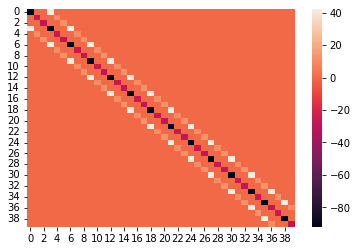

In [841]:
sns.heatmap((- np.kron(np.eye(3),H) - np.kron(np.eye(T), B.T@invD@B))[5960:, 5960:])

In [892]:
q_test2 = kalman_newton_recursive(y,mu0,S0, A, B, D,E)

Linear solve...
6462602226.820206


  0%|          | 0/1998 [00:00<?, ?it/s]

In [872]:
mean_array = np.array([0, mean_x_obs, mean_y_obs])

Text(0.5, 0.98, 'Kalman eks vs optimisation based latent predictions on pupil data')

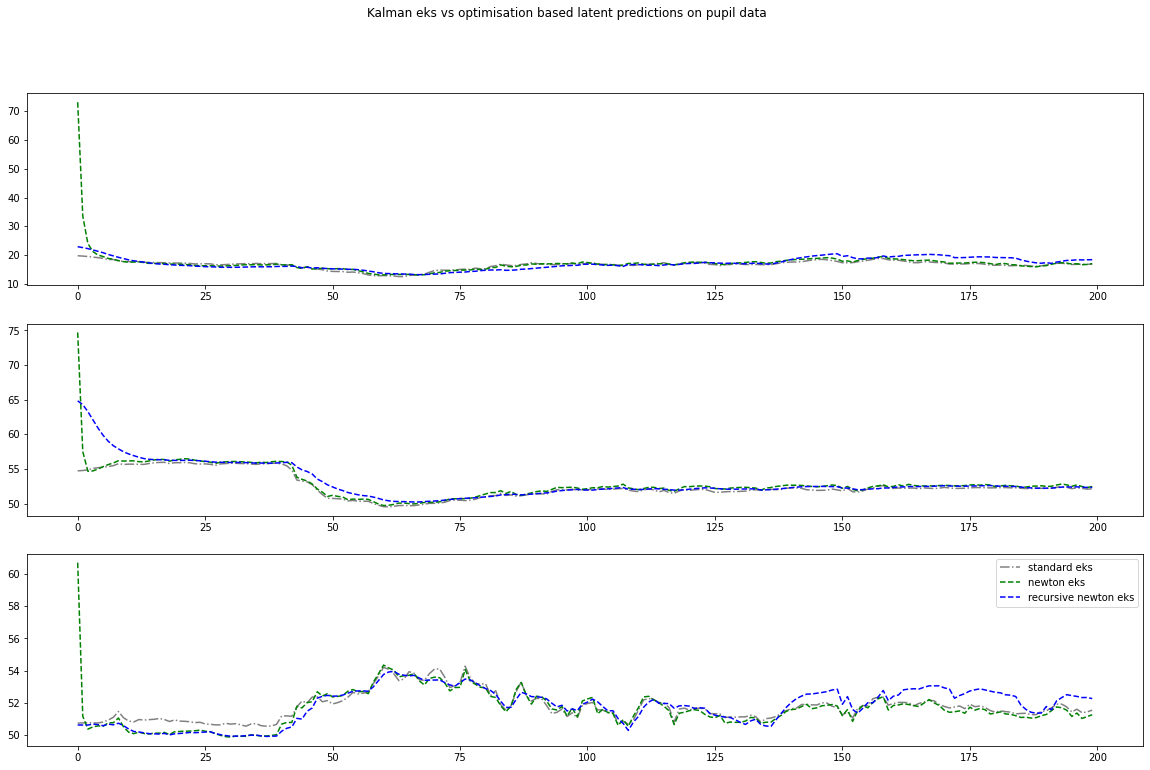

In [935]:
fig, ax = plt.subplots(3,1,figsize=(20,12))
for i in range(3):
    ax[i].plot(q[:200,i], "-.",color="grey", label="standard eks")
    ax[i].plot(q5[:200,i]+mean_array[i], "--",color="green", label="newton eks")
    ax[i].plot(q_test2[:200,i]+mean_array[i], "--",color="blue", label="recursive newton eks")
plt.legend()
plt.suptitle("Kalman eks vs optimisation based latent predictions on pupil data")

In [936]:
np.linalg.norm(q5[1:,:]-q_test2[1:,:],2),np.linalg.norm(q[1:,:]-q_test2[1:,:],2),np.linalg.norm(q5[1:,:]-q[1:,:],2)


(37.365990849426865, 3239.7731815405464, 3237.5121673790823)

In [625]:
H 

array([[ 24.4628848 ,   0.        ,   0.        , -11.73084993,
          0.        ,   0.        ],
       [  0.        ,  87.95576595,   0.        ,   0.        ,
        -41.97576299,   0.        ],
       [  0.        ,   0.        ,  24.66278851,   0.        ,
          0.        , -10.3308725 ],
       [-11.73084993,  -0.        ,  -0.        ,  24.4628848 ,
          0.        ,   0.        ],
       [ -0.        , -41.97576299,  -0.        ,   0.        ,
         87.95576595,   0.        ],
       [ -0.        ,  -0.        , -10.3308725 ,   0.        ,
          0.        ,  24.66278851]])

In [ ]:
plt.plot(q_test2

## Fish predictions test

In [376]:
y.shape

(2000, 8)